In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/damodargupta/Desktop/ML/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# checking if the dataset is balanced or imbalanced
df['Outcome'].unique()
df['Outcome'].value_counts()


0    500
1    268
Name: Outcome, dtype: int64

In [44]:
#here few misconception is there lke BMI can not be zero, BP can't be zero, glucose, insuline can't be zero so lets try to fix it
# now replacing zero values with the mean of the column
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

In [45]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [46]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [47]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Count'>

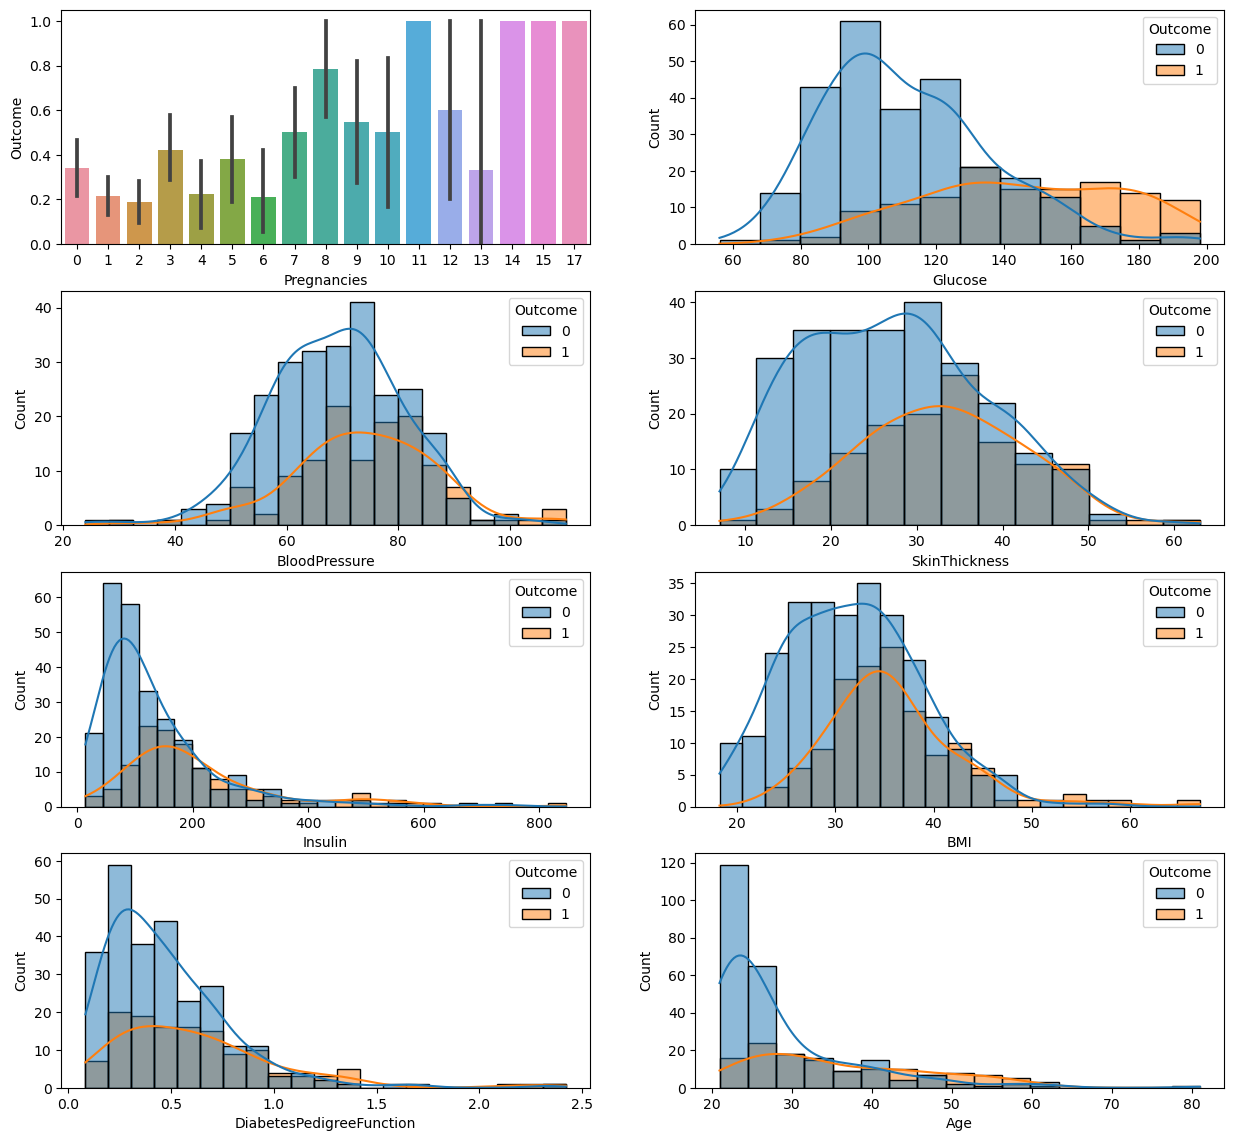

In [48]:
figure = plt.subplots(4 , 2 , figsize = (15,14))
plt.subplot(421)
sns.barplot(data=df,  x='Pregnancies' , y = 'Outcome' )
plt.subplot(422)
sns.histplot(data=df,  x='Glucose'  , kde=True , hue = 'Outcome')
plt.subplot(423)
sns.histplot(data=df,  x='BloodPressure' , kde=True , hue = 'Outcome' )
plt.subplot(424)
sns.histplot(data=df,  x='SkinThickness' , kde=True , hue = 'Outcome' )
plt.subplot(425)
sns.histplot(data=df,  x='Insulin' , kde=True , hue = 'Outcome' )
plt.subplot(426)
sns.histplot(data=df,  x='BMI' , kde=True , hue = 'Outcome' )
plt.subplot(427)
sns.histplot(data=df,  x='DiabetesPedigreeFunction' , kde=True , hue = 'Outcome' )
plt.subplot(428)
sns.histplot(data=df,  x='Age' , kde=True , hue = 'Outcome')


<Axes: xlabel='Age'>

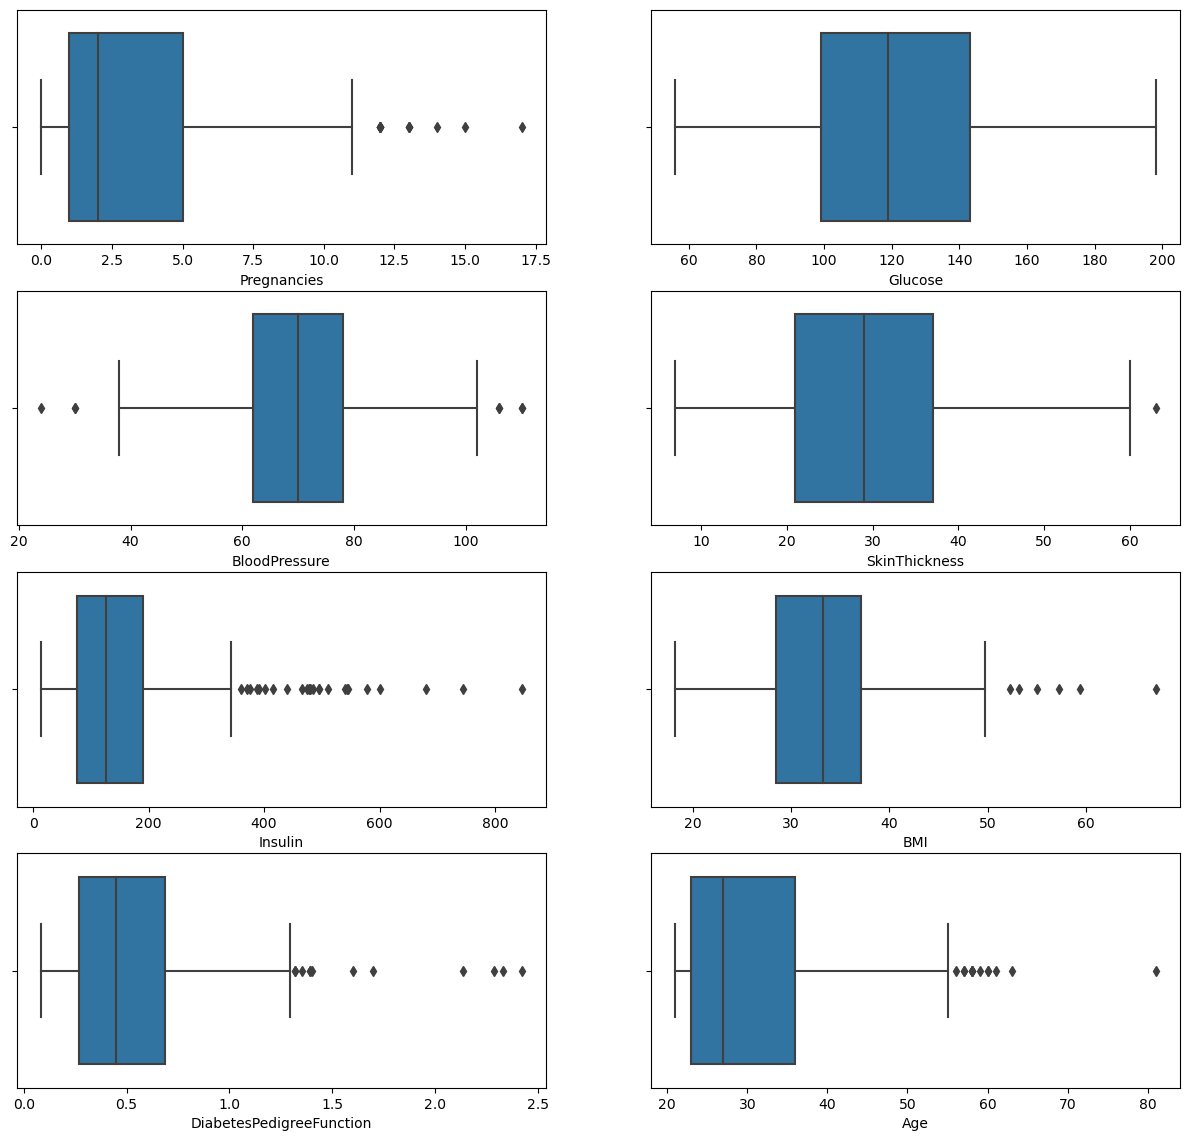

In [49]:
figure = plt.subplots(4 , 2 , figsize = (15,14))
plt.subplot(421)
sns.boxplot(data=df,  x='Pregnancies' )
plt.subplot(422)
sns.boxplot(data=df,  x='Glucose'  )
plt.subplot(423)
sns.boxplot(data=df,  x='BloodPressure' )
plt.subplot(424)
sns.boxplot(data=df,  x='SkinThickness' )
plt.subplot(425)
sns.boxplot(data=df,  x='Insulin' )
plt.subplot(426)
sns.boxplot(data=df,  x='BMI' )
plt.subplot(427)
sns.boxplot(data=df,  x='DiabetesPedigreeFunction')
plt.subplot(428)
sns.boxplot(data=df,  x='Age' )

In [50]:
# Calculate IQR and bounds for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from every column
cleaned_data = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

In [51]:
cleaned_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
6,3,78,50,32,88,31.0,0.248,26,1
14,5,166,72,19,175,25.8,0.587,51,1
16,0,118,84,47,230,45.8,0.551,31,1
19,1,115,70,30,96,34.6,0.529,32,1
...,...,...,...,...,...,...,...,...,...
748,3,187,70,22,200,36.4,0.408,36,1
751,1,121,78,39,74,39.0,0.261,28,0
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0


<Axes: xlabel='Age'>

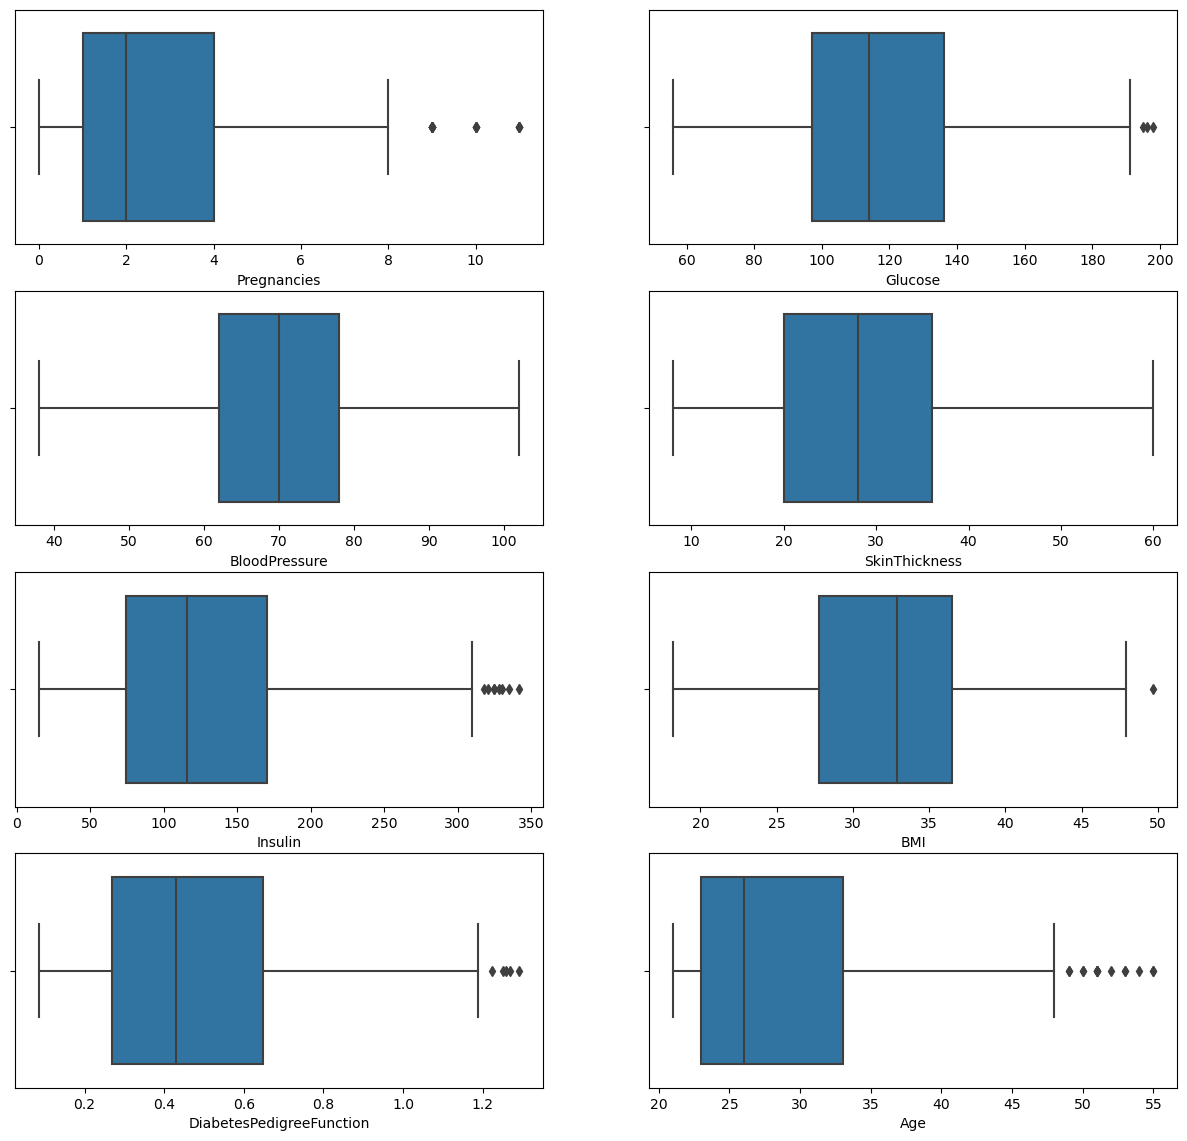

In [52]:
figure = plt.subplots(4 , 2 , figsize = (15,14))
plt.subplot(421)
sns.boxplot(data=cleaned_data,  x='Pregnancies' )
plt.subplot(422)
sns.boxplot(data=cleaned_data,  x='Glucose'  )
plt.subplot(423)
sns.boxplot(data=cleaned_data,  x='BloodPressure' )
plt.subplot(424)
sns.boxplot(data=cleaned_data,  x='SkinThickness' )
plt.subplot(425)
sns.boxplot(data=cleaned_data,  x='Insulin' )
plt.subplot(426)
sns.boxplot(data=cleaned_data,  x='BMI' )
plt.subplot(427)
sns.boxplot(data=cleaned_data,  x='DiabetesPedigreeFunction')
plt.subplot(428)
sns.boxplot(data=cleaned_data,  x='Age' )

<Axes: >

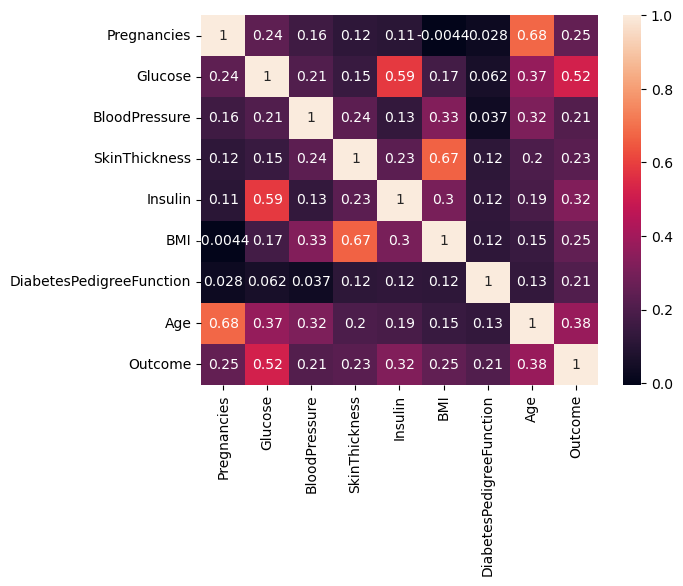

In [53]:
corr = cleaned_data.corr(method='pearson')
sns.heatmap(corr , annot = True)

In [54]:
# independent and dependent variables

X = cleaned_data.iloc[: , :-1]
y = cleaned_data.iloc[: , -1]

In [55]:
y

3      0
6      1
14     1
16     1
19     1
      ..
748    1
751    0
755    1
760    0
765    0
Name: Outcome, Length: 329, dtype: int64

In [56]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [57]:
classifier = DecisionTreeClassifier()

In [58]:
classifier.fit(X_train , y_train)

DecisionTreeClassifier()

[Text(0.7180851063829787, 0.9545454545454546, 'x[1] <= 154.5\ngini = 0.38\nsamples = 263\nvalue = [196, 67]'),
 Text(0.5638297872340425, 0.8636363636363636, 'x[0] <= 7.5\ngini = 0.278\nsamples = 228\nvalue = [190, 38]'),
 Text(0.3191489361702128, 0.7727272727272727, 'x[5] <= 30.95\ngini = 0.229\nsamples = 212\nvalue = [184, 28]'),
 Text(0.10638297872340426, 0.6818181818181818, 'x[7] <= 40.5\ngini = 0.078\nsamples = 99\nvalue = [95, 4]'),
 Text(0.06382978723404255, 0.5909090909090909, 'x[0] <= 2.5\ngini = 0.041\nsamples = 96\nvalue = [94, 2]'),
 Text(0.0425531914893617, 0.5, 'gini = 0.0\nsamples = 60\nvalue = [60, 0]'),
 Text(0.0851063829787234, 0.5, 'x[5] <= 23.05\ngini = 0.105\nsamples = 36\nvalue = [34, 2]'),
 Text(0.0425531914893617, 0.4090909090909091, 'x[6] <= 0.57\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.02127659574468085, 0.3181818181818182, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.06382978723404255, 0.3181818181818182, 'gini = 0.0\nsamples = 1\nvalue = [

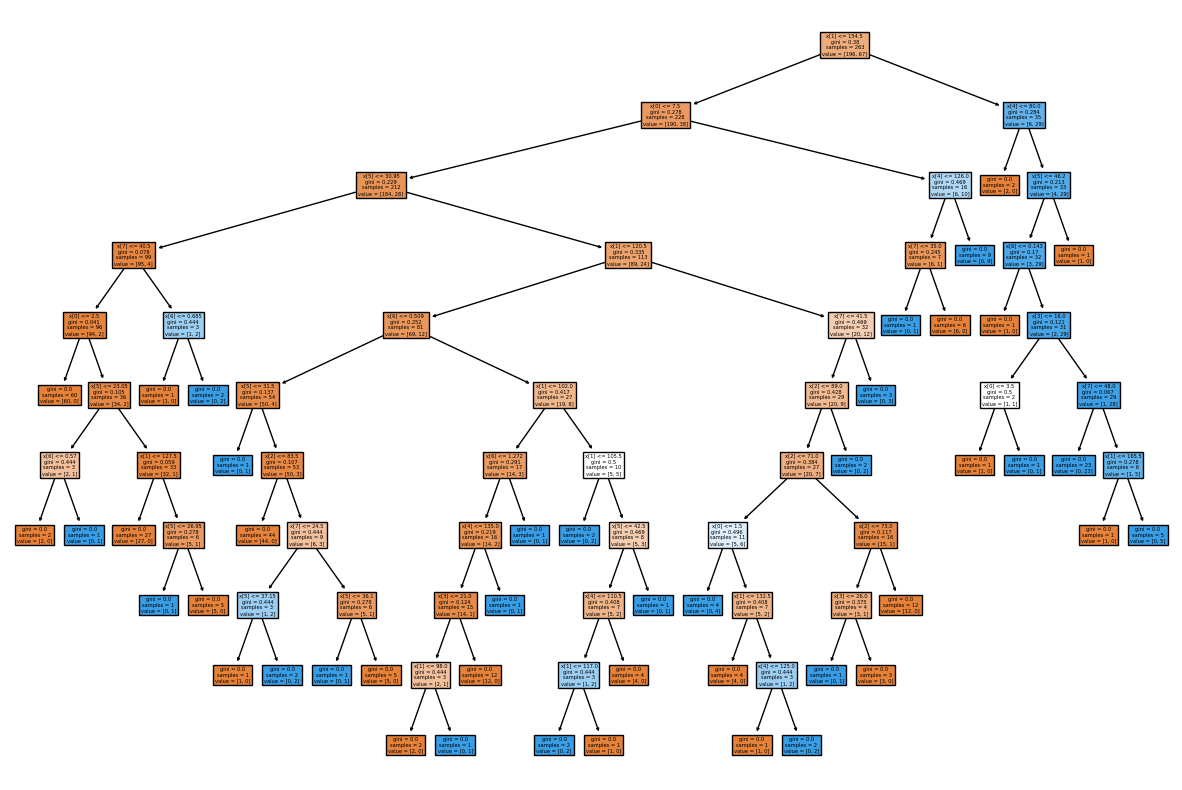

In [59]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(classifier , filled=True)

In [60]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [61]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[36 13]
 [ 4 13]]
0.7424242424242424
              precision    recall  f1-score   support

           0       0.90      0.73      0.81        49
           1       0.50      0.76      0.60        17

    accuracy                           0.74        66
   macro avg       0.70      0.75      0.71        66
weighted avg       0.80      0.74      0.76        66



# HYPERPARAMETER TUNING

In [62]:
parameter = {
    'criterion' : ['gini', 'entropy' , 'log_loss'],
    'splitter' : ['best' , 'random'],
    'max_depth' : [1,2,3,4,5,6,7,8,9,10] , 
    'max_features' : ['auto' , 'sqrt' , 'log2']
}

In [63]:
model = GridSearchCV(estimator=classifier , param_grid=parameter , cv=5 , scoring='accuracy')

In [64]:
model.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [65]:
model.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [70]:
model = DecisionTreeClassifier(criterion='entropy' , max_depth=3 , max_features='log2' , splitter='best')

In [71]:
model.fit(X_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='log2')

In [72]:
# prediction

y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0])

In [73]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[37 10]
 [ 3 16]]
0.803030303030303
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        47
           1       0.62      0.84      0.71        19

    accuracy                           0.80        66
   macro avg       0.77      0.81      0.78        66
weighted avg       0.84      0.80      0.81        66

